In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

In [2]:
bd=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lenguaje natural/categorizacion.xlsx')

In [3]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23377 entries, 0 to 23376
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_id            23377 non-null  object
 1   news_url_absolute  23377 non-null  object
 2   news_init_date     23377 non-null  object
 3   news_final_date    23377 non-null  object
 4   news_title         23377 non-null  object
 5   news_text_content  23377 non-null  object
 6   tokens             23377 non-null  object
 7   clase              23377 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [4]:
bd.head()

,news_id,news_url_absolute,news_init_date,news_final_date,news_title,news_text_content,tokens,clase
0,news10006,https://www.bluradio.com/economia/precio-dolar...,2022-07-30,2022-08-14,Precio dolar hoy: la cotizacion de la divisa a...,"Este martes, 2 de agosto, el dolar alcanzo un ...","['Este', 'martes', ',', '2', 'de', 'agosto', '...",Regulaciones
1,news10011,https://www.semana.com/economia/macroeconomia/...,2022-07-30,2022-08-14,Es cierto: El presidente Gustavo Petro quiere ...,No hay nada mas permanente que lo temporal y a...,"['No', 'hay', 'nada', 'mas', 'permanente', 'qu...",Innovación
2,news10015,https://elcomercio.pe/respuestas/que/gustavo-p...,2022-07-30,2022-08-14,Gustavo Petro: ?Que dice el informe final de s...,El equipo de empalme del gobierno del presiden...,"['El', 'equipo', 'de', 'empalme', 'del', 'gobi...",Regulaciones
3,news10028,https://www.lanacion.com.ar/estados-unidos/cua...,2022-07-30,2022-08-14,Cuanto cuesta y como enviar dinero de Estados ...,?Buscas opciones para el envio de dinero de Es...,"['?', 'Buscas', 'opciones', 'para', 'el', 'env...",Sostenibilidad
4,news10029,https://www.lanacion.com.ar/estados-unidos/com...,2022-07-30,2022-08-14,Como enviar dinero de Estados Unidos a otros p...,?Buscas opciones para el envio de dinero de Es...,"['?', 'Buscas', 'opciones', 'para', 'el', 'env...",Sostenibilidad


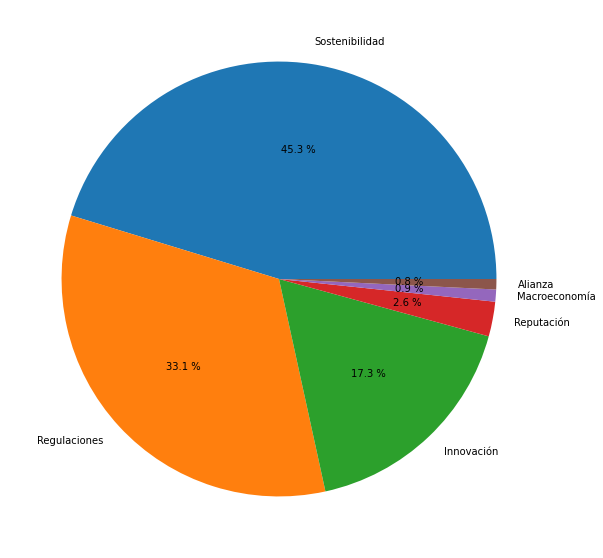

In [34]:
plt.figure(figsize=(10,10))
exgrupo= bd['clase']
exGru=bd['clase'].value_counts()
plt.pie(exGru, labels=exGru.keys(),autopct="%0.1f %%")
plt.show()